<a href="https://colab.research.google.com/github/tmckim/materials-fa23-colab-working/blob/main/hw/hw09/hw09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Allen Institute Cell Types Dataset - Focus on Epilepsy

It's time to access the Allen Cell Types Database to do some analysis for Dr. Marsh's research. Refer to the HW08 document for details on how this dataset was collected and how to interpret it.

This notebook will help us investigate data collected from the [Cell Types](https://celltypes.brain-map.org/) dataset from the Allen Brain Institute.


## Before you start - Save this notebook!

When you open a new Colab notebook from the WebCampus (like you hopefully did for this one), you cannot save changes. So it's  best to store the Colab notebook in your personal drive `"File > Save a copy in drive..."` **before** you do anything else.

The file will open in a new tab in your web browser, and it is automatically named something like: "**hw09.ipynb**". You can rename this to just the title of the assignment "**hw09.ipynb**". Make sure you do keep an informative name (like the name of the assignment) so that you know which files to submit back to WebCampus for grading! More instructions on this are at the end of the notebook.


**Where does the notebook get saved in Google Drive?**

By default, the notebook will be copied to a folder called “Colab Notebooks” at the root (home directory) of your Google Drive. If you use this for other courses or personal code notebooks, I recommend creating a folder for this course and then moving the assignments AFTER you have completed them.

____
# Learning Objectives
## At the end of this assignment, you'll be able to:
* Apply big data from high-throughput experiments to detect patterns and quantify data
* Apply appropriate statistics to quantitative results
* Describe practical considerations of data collection in humans
* Access data from high-throughput experiments on living human brain tissue in the Allen Institue database
* Interpret basic science data in the context of pre-translational research
______

# Setup and import files needed

In [ ]:
# Setup and add files needed to gdrive
# If you restart colab, start by rerunning this cell first!
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

#!mkdir -p '/content/gdrive/My Drive/colab-materials-NS499DataSci-notebooks/'
%cd /content/gdrive/My Drive/colab-materials-NS499DataSci-notebooks/
!rm -r materials-fa23-colab

!git clone https://github.com/tmckim/materials-fa23-colab '/content/gdrive/My Drive/colab-materials-NS499DataSci-notebooks/materials-fa23-colab/'

%cd /content/gdrive/My Drive/colab-materials-NS499DataSci-notebooks/materials-fa23-colab/hw/hw09/

## Import packages needed

In [ ]:
# Import our plotting package from matplotlib
import matplotlib.pyplot as plt

# Specify that all plots will happen inline & in high resolution
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import pandas for working with databases
import pandas as pd

# Import numpy
import numpy as np

# Import stats from scipy- *new*
from scipy import stats

# Print statement to confirm
print('Packages imported!')


## Load in the data file

The data was directly downloaded from the website to a csv file. It was copied to your google drive folder upon import at the beginning. This way we can easily import the data we want to work with and don't have to deal with loading and setting up the AllenSDK.

In [ ]:
## Import file
all_data = pd.read_csv('Allen_celltypes_specimen_alldata_downloaded_11102023.csv')
all_data

## Preview the data

In [ ]:
# Let's sort the column names and take a peek at them
list(all_data)                # if you want a nicely aligned column in order appearing in dataframe

In [ ]:
# np.sort(list(all_data))     # uncomment this line if you want to see them sorted alphabetically instead

**Exercise**: Which column do you think has the info about humans versus mouse data? Fill this in the code below where it says `<insert_column_name_here>`<br>
*Hint*: Look back and check out what values are in each column.

In [ ]:
# Use unique to show the categories and information we need in the next step
all_data.<insert_column_name_here>.unique()

**Exercise**: Now we want to subset our data frame based on this. We **only want data for humans**, so subset the dataset like we've been practicing in `pandas`.

In [ ]:
# Get human data only
human_data = ...
human_data

There are alot of variables here that we don't need. You will also notice that some were specific to mouse data, such as `line_name` which is now filled with all NaNs (missing values) for our human subject data. We are going to simplify our dataframe using `.drop` to remove columns we don't need. Just run the cell below.

In [ ]:
# Drop columns that we don't need
human_data = human_data.drop(columns=['line_name', 'structure_parent__acronym', 'nr__max_euclidean_distance',
                                     'nr__number_stems','nr__number_bifurcations', 'nr__average_contraction',
                                     'nr__average_parent_daughter_ratio', 'nr__reconstruction_type', 'si__height',
                                     'si__width', 'si__path', 'csl__x', 'csl__y', 'csl__z','cell_reporter_status',
                                     'm__glif', 'm__biophys', 'm__biophys_perisomatic', 'm__biophys_all_active',
                                     'morph_thumb_path','ephys_thumb_path', 'ephys_inst_thresh_thumb_path'])

In [ ]:
# Now check the # of columns in our dataset
human_data.shape

# Brain regions and cells to examine

Now that we only have the human data we want to work with, it's time for your tasks from Dr. Marsh. She has assigned you to evalute the properties of neurons in the temporal lobe, and determine if they are distinct from properties of other brain regions. <br>
We will focus 3 brain regions that have the most cells in the dataset for comparison. <br>
The three brain regions are: <br>


1.   Middle temporal gyrus (MTG) - 309 cells
2.   Frontal lobe (FroL) - 23 cells
3.   Middle frontal gyrus (MFG) - 26 cells

Check out the regions in the atlas [here](https://atlas.brain-map.org/atlas?atlas=138322605#atlas=138322605&plate=102339919&structure=10390&x=40320&y=46976&zoom=-7&resolution=124.49&z=3). You can type the name in to the top left search bar.



**Exercise**: Let's see how many brain regions there actually are. Fill in the line below where you see `<insert_df_name>` and `<insert_brainarea_column_name>`.

In [ ]:
# Get info on brain regions
print('brain regions:', <insert_df_name>.<insert_brainarea_column_name>.unique())

Now let's take a look at the number of cells per brain region. Just run the cell below.

In [ ]:
# For loop to find and print the cell counts for each brain region
nums = []                                                                         # This will allow us to do an overall count too

for i, structure__acronym in enumerate(human_data.structure__acronym.unique()):
  brain_data = human_data[human_data.structure__acronym == structure__acronym]
  cell_count = len(brain_data)
  nums = np.append(nums, cell_count)
  print(f'# of cells in {structure__acronym}: ' + str(cell_count))

print('Total # of cells in dataset: ' + str(sum(nums)))

# Considering demographics: converting age from string to number

It's time do a little bit of data wrangling.


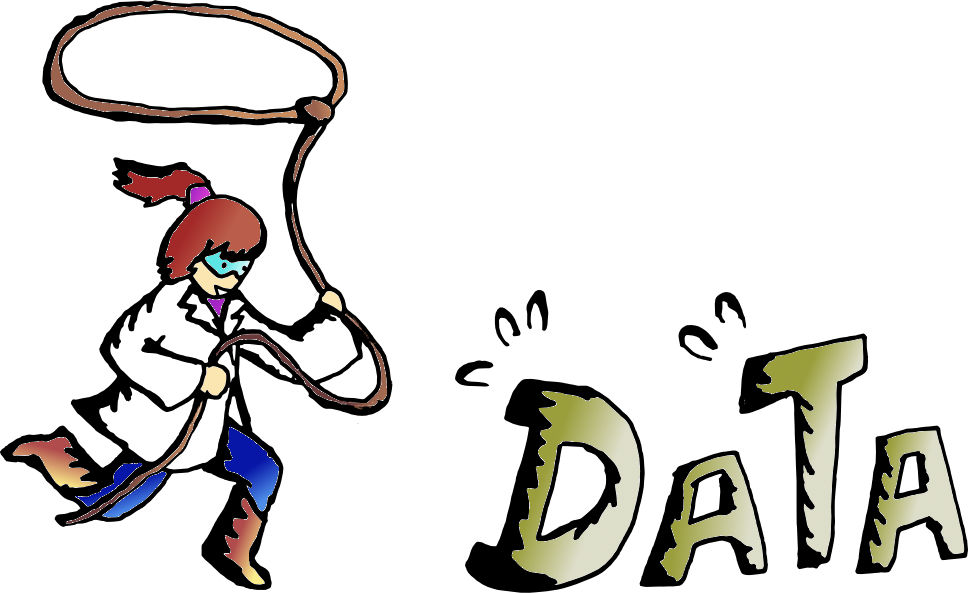

Image [source](https://www.codeastar.com/data-wrangling/)

Let's review our age variable. Before running the following cell, what would you expect a value like this to be- in python, what should be the data `type`?

In [ ]:
# What is age?
human_data.donor__age.unique()

Hmmmm, interesting. It seems there is more information in each cell than we really need. We need to convert this data into a format that is useable for us to review some desriptive statistics (more on this below).

In one of the beginning labs for this course, we worked with a method to split text or strings. We will do that below. Just run this cell.

In [ ]:
# Split the string into the 2 components - numbers versus text
age = human_data.donor__age.str.split(pat = ' ', expand = True)         # Uses pandas str.split to find the space (pat = ' ') between the text for the # versus yrs
age.rename(columns={0:'age', 1:'years'},inplace=True)                   # Setting expand on the above line creates a df with two columns [0 1] and we want to rename them to be informative
age                                                                     # Show the final df

Remember, we just performed this manipulation on strings (text). We will want to work with `age` as a number. We will convert it to an integer below. Just run this cell.

In [ ]:
# Convert string to a number
age['age'] = age['age'].astype(int)             # we want to perform this manipulation on the `age` column of our df
age['age']

You can double check it was successful if you'd like here by also finding `unique` values again. We can see our array does not include quotes around our numbers.

In [ ]:
# Check the values and that they are not strings anymore
age.age.unique()

Now we will add our columns to the original dataframe. We will use `pd.concat` to do this. <br>
It basically sticks the new columns we just made onto the end of our dataframe. <br>
Note that this is slightly different than `join` because we don't really specify how to add things on, just to do it. More on this in after running the following cell.

In [ ]:
# Concatenate the original dataframe and our age dataframe
human_data = pd.concat([human_data, age],axis = 1)
human_data

You can see we now have more columns and the values were just added to end of the dataframe. This works in our case because we took the data from our original table in the same order as we've been working with. We didn't sort or manipulate it in any way in between steps, so the values for age should still appropriately match the entry for each participant. This is something to be aware of when working with data. Below, you will see an example of code that you can use to check and briefly verify that the values do still match up from the original dataframe. <br> <br> If you are working with lots of data and doing various manipulations, it's always a good idea to build in checks like these. It helps to ensure you aren't introducing anything you don't want into the data, to prevent errors, and also as a way to write notes to yourself on what you did and why! You can save these in intermediate versions of your code and then comment out or remove in the final, polished version if necessary.

In [ ]:
# Double check:
# Select two columns from our dataframe side by side to compare by eye
compare = human_data[['donor__age', 'age']]
compare

Great! We are almost ready to move on to reviewing our data. But before we get there, we should clean up the dataframe. <br><br>
**Exercise**: Remove the redundant columns now that we've added `age` as an integer. Drop the original age column (starts with `donor__`) and the new `years` column that is just text. Fill in the parts below that start with: `<insert_..>`.<br>
*Hint*: You will need to use `axis = 1` in your code to specify with `pandas` that you want to drop the [columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

In [ ]:
# Remove the extra columns

human_data = <insert_df_name>.<insert_method_to_use>(['<insert_col_1_name>', '<insert_col_2_name>'], axis = 1)

# Reviewing the Data: Categorical and Numerical Values Contained in Columns

**Exercise**: Let's print out information about our dataset. <br>Use the example statement in the first cell to repeat this process for the other cells. <br> The comment lists what should be printed, so find the appropriate column name from the dataframe to print out the information about the conditions for each column.

In [ ]:
# Show the disease state (reason for tissue removal)
print('Disease state:', human_data.donor__disease_state.unique())

In [ ]:
# Race/ethnicity

In [ ]:
# Biological Sex

In [ ]:
# Years of seizure history

In [ ]:
# Cortical layer from where cells were sampled in the brain region


## Frequency of Values from Columns

**Exercise**: What if we want to get a count of the values from our columns? We can combine `unique` from above with `len`. Start by finding the number of participants in the dataset by replacing the code below where it contains `<insert_..>` or `...`. Then complete the remaining cells to get more information from some of the columns we examined above.

In [ ]:
# Donor name / donor id (they are coding the same information in separate columns)
print('Number of participants in this dataset:', len(<insert_dataframe_name>.<insert_col_name>.unique()))

In [ ]:
# Cell count- does this match what we already calculated above? It should!
print('there are', ... , 'cells in this dataset')

**Exercise**: To get the count of biological sex information, we subset our data first into the corresponding groups. Once we do this, you can use similar code from above to complete the following lines. Fill in the appropriate code below where you see `...`

In [ ]:
# Female count
females = human_data[(human_data.donor__sex == 'Female')]
print('there are', ... , 'females in this dataset')

In [ ]:
# Male count
males = human_data[(human_data.donor__sex == 'Male')]
print('there are', ... , 'males in this dataset')

## Optional- what do you want to know?

In [ ]:
#Advanced: If you want to get information about race/ethnicity, use a for loop below to do so

nums = []                                                                         # This will allow us to do an overall count too

for i, ... in enumerate(...):
  race_data = ...
  race_count = ...
  nums = np.append(..., ...)
  print(f'Number of participants in the {donor__race} category: ' + str(...))

print('Total # of participants in dataset: ' + str(sum(nums)))

In [ ]:
# Optional:
# If there is anything else about the columns or dataset that you are curious about, test it here!



# Descriptive Statistics

We will now examine descriptive statistics of our different variables. We are interested in things that we've been discussing from the course such as counts, means, and standard deviation. This will tell us more about our sample -- it will describe the data we have available to work with.

From our previous lab on comparing the `datascience` and `pandas` packages, we worked with [groupby](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html). We used this operation to help us get info about the variables in our dataset into a summary dataframe. Refer back to lab08 if you need a refresher on how to work with the code below.


## Using  `groupby` to generate our descriptive table

**Exercise**: Complete the code below in the sections that start with `<insert_...>` to find descriptives about the dataset. <br>
We will start by grouping by brain regions and returning the count of ids as well as the mean and standard deviation of age based on these groupings. <br><br>

When we specify what we want to use with `by`, this will be one or more column names that contain *categorical* data. When we specify what to use with `agg`, this is where we put in column names for *numerical* data and the method we want to perform on the data (mean, count, std, etc.)

In [ ]:
# Calculate summary statistics to review and compare to plot
print("Summary statistics:")

# Get the values
summary_stats = human_data.groupby(by=["<insert_brain_region_col_name>"]).agg(
    {"specimen__id": "count","age": ["mean", "std"]}).round(2)

display(summary_stats)

Hmmm, in all cases you can see that we have multiple specimen id values - this is a count of the cells in the brain region. However, when we look at age, we calculate a mean, but if that is the case, why is the standard deviation zero?

This has to do with the fact that `specimen__id` corresponds to each cell, and a single participant may contribute multiple cells to the dataset. So, let's now check this in combination with data from a column that allows us to uniquely identify each participant.

**Exercise**: Just run the cell below. Notice that we are using a new option for `agg` called `nunique`. This will give us the count of unique entries for our column, `donor__name`.

In [ ]:
# Calculate summary statistics to review and compare to plot
print("Summary statistics:")

# get the numerical values
summary_stats = human_data.groupby(by=["structure__acronym"]).agg(
    {"specimen__id": "count","donor__name":"nunique","age": ["mean", "std"]}).round(2)

display(summary_stats)

This makes it more clear why there are zeros in the standard deviation that corresponds to age. We can see that in those rows, there is only 1 participant that is contributing cells to that brain region.

**Exercise**: We want to `groupby` using brain region and donor disease state to return the count of cells (`specimen__id`) as well as participant (`donor__name`). <br>
Complete the code below in the sections that start with `<insert_...>`.



In [ ]:
# Calculate summary statistics to review and compare to plot
print("Summary statistics:")

# Get the  values
summary_stats = human_data.groupby(by=["<insert_brain_region_col_name>", "<insert_disease_state_col_name>"]).agg(
    {"specimen__id": "count", "donor__name":"nunique"}).round(2)

display(summary_stats)

Here we can see which brain regions have cells related to conditions for surgical removal of tissue that were for epilepsy versus tumor.

# Brain Regions of Interest

Now that we've reviewed info about all of data, we want to go through and specifically focus on our brain regions of interest. <br><br>
For each **brain region** and **cortical layer**, we want to calculate the **mean** and **standard deviation** of the **firing rate** and **resting potential**.

**Exercise**: First, we want to subset our dataframe to only contain data from the **brain regions** we are interested in. <br>
Fill in the abbreviations for the 3 regions we want to work with where the code below contains `<insert_brain_region_abbrev>`. <br>
*Hint*: This was listed above under the section 'Brain regions and cells to examine'.

In [ ]:
# Dataset with data from 3 regions
# Notice here we are using the or operator ('|')
brains = human_data[(human_data.structure__acronym == '<insert_brain_region_abbrev>') |
        (human_data.structure__acronym == '<insert_brain_region_abbrev>') |
        (human_data.structure__acronym == '<insert_brain_region_abbrev>')]
brains

**Exercise**: Use `unique` to check that the dataframe now only contains the 3 regions we want to work with.

In [ ]:
# Check we properly subsetted the dataframe to contain only the brain regions we wanted with `unique`


## Calculating Descriptive Statistics

**Exercise**: Now we are ready to calculate descriptives for our brain regions. <br> We want to obtain the **mean** and **standard deviation** for each **brain region** and **cortical layer** combination of values from the dataframe for the **resting potential** and **average firing rate**. <br>
Hint: look for a combination of these words in the column names. Also, the column for resting potential will have *negative* values in it. <br><br>

Use `groupby` in the following code cell and input the correct information from the prompt. Review previous examples that we've worked with above or in **lab08** if you need a reference. Also make sure to round the results to 2 decimal places (we've done this above as well). <br><br>

*Optional*: You are welcome to also include the counts of `specimen__id` for the combinations of brain region and cortical layers if you would like to see how many cells there are for each.

In [ ]:
# Calculate summary statistics to review and compare to plot
print("Summary statistics:")

# get the numerical values using `groupby`
summary_stats_brains = ...

display(summary_stats_brains)

You should see some NaN values, particularly for the combinations of conditions (brain region and cortical layers) that only have a count of 1 cell. This indicates there were not measurements of useable data.

## Looking into NaN values further

NaNs are important to consider though, because depending on how we setup our statistics next, NaNs may or may not influence our results. This depends on how the packages deal with NaNs in our dataframe, and what the default behavior of the package is.

Let's check our variables of interest, and keep this in mind as we go through the next section. I will highlight what we can do when it comes to our data with NaNs.

We will use `pandas` `isna` to help us here. More documentation can be found here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html

In [ ]:
# This finds NaNs and then we check whether we have them (True/False)
nan_df = brains.ef__vrest.isna()
nan_df.unique()

In [ ]:
# This finds NaNs and then we check whether we have them (True/False)
nan_df = brains.ef__avg_firing_rate.isna()
nan_df.unique()

**Summary**: This means that there are not NaN values in the resting membrane potential. However, we do have to account for NaNs in average firing rate data. <br>
You can also refer back to the descriptive tables you made above. If a mean value was NaN, it means there was no measurement for that condition.

# Making Comparisons: Two sample statistics

In our discussions of hypothesis testing, we have been testing whether two distributions were different or if the observed distribution had a different mean than the population distribution.

If the distributions are normal we can use what are called parametric statistics. These include tests like t-tests. These are included in standard statistical packages (such as `stats` in `scipy`). This one is a new [package](https://docs.scipy.org/doc/scipy/reference/stats.html) we imported at the top of this notebook! <br>
We could run these tests on our data with code like this: `stats.ttest_ind()` if we were running an independent samples t-test.

If instead the distributions we are dealing with in our data are not normal, we would use a nonparametric test. This type of test can be used when our population distributions are skewed. The type of test we would use in this case is called the Mann-Whitney U for independent samples: `stats.mannwhitneyu()`.

# Supplemental Statistical Resources

The following sections of [An Introduction to the Science of Statistics: From Theory to Implementation](https://www.math.arizona.edu/~jwatkins/statbook.pdf):
1.   Mean (section 2.1.2, page 21)
2.   Standard Deviation (section 2.2.2, page 25)
3.   Interpreting p-values (section 18.3, page 331)
4.   T-test (section 20.5 for two samples, page 368)
5.   Mann-Whitney U test (section 20.9.2, page 378)

[One versus two tail tests](https://www.graphpad.com/guides/prism/8/statistics/one-tail_vs__two-tail_p_values.htm) <br>

[Mann-Whitney test](https://www.graphpad.com/guides/prism/8/statistics/how_the_mann-whitney_test_works.htm)

## Determining which test to use - checking for skew
To determine which we will use, we will check the skewness of our data. This option is also included in the `scipy` package, and we will use: `stats.skewtest()` to check the distributions of our variables of interest. <br><br>

The results of the test will display a p-value and we will compare this to a cutoff of 5%. <br> If the p-value from the skewness results is less than 0.05, this indicates that our data is skewed.

**Exercise**: Subset the `brains` dataframe from above to get the data for two brain regions to compare. <br>
Use the '**FroL**' and the '**MTG**' regions.

In [ ]:
# Subset the data into what we need for comparison
frol_df = ...
mtg_df = ...

## Evaluating brain region differences in resting potential

**Exercise**: Now we will run the skew test and plot the data for **resting potential**. Fill in the code below where it starts with `<insert_...>` based on the dataframes we subset above and the correct column name for resting potential. <br>
*Hint*: the column name has the text `rest` in it.

In [ ]:
# Subselect our samples- fill in this code
sample_1 = <insert_dataframe_name_FroL>['<insert_colname_for_restingpotential>']
sample_2 = <insert_dataframe_name_MTG>['<insert_colname_for_restingpotential>']

# Don't change below this line
# Run the skew test
stats_1, pvalue_1 = stats.skewtest(sample_1)
stats_2, pvalue_2 = stats.skewtest(sample_2)

# Print the p-value of both skew tests
print('FroL skew test pvalue: ' + str(pvalue_1))
print('MTG skew test pvalue: ' + str(pvalue_2))

# Plot our distributions
plt.hist(sample_1)
plt.title('FroL distribution')
plt.show()
plt.hist(sample_2)
plt.title('MTG distribution')
plt.show()

What do these results show? You should see that our data are not considered skewed based on the plots and p-value.

This indicates that we should use the Independent Samples T-test. Just run the cell below.

In [ ]:
# Independent Samples t-test
print(stats.ttest_ind(sample_1, sample_2))

**Exercise**: Interpret the results of your test. What can you say about the difference between temporal and non-temporal neurons? What can't you say? Think about the sample you were testing when you describe what your results apply to. You can also go back to the descriptives we looked at to think about these questions. <br>
You could also look back at the mean values for each brain region and state how the two compare- how do they differ?

*Type your response here*

## Evaluating brain region differences in average firing rate


**Exercise**: Repeat the above procedure, but now use the column that contains data for **average firing rate**. <br>

Note that in the code below, we account for NaNs by removing those observations from consideration. We didn't have data there, so we are going to tell python to ignore them. If we didn't do this, the results for the test and plot would all come out to NaN and not tell us anything about our data.

In [ ]:
# Copy and paste the code you used above (including the plotting code), editing the `sample_1` and `sample_2` assignment statements


This indicates we should use the Mann-Whitney U test.
Just run the cell below.

In [ ]:
# Mann-Whitney U test
print(stats.mannwhitneyu(sample_1, sample_2, nan_policy= 'omit'))     # here is how we deal with NaNs

**Exercise**: Interpret the results of your test. What can you say about the difference between temporal and non-temporal neurons? What can't you say? Think about the sample you were testing when you describe what your results apply to.

*Type your response here*

# Comparison of your choice

Using this data, make an additional comparison of your choice. <br>
1.   Describe your comparison
2.   Check the data for skew and plot
3.   Run the appropriate test: independent t-test or Mann-Whitney U
4.   Interpret the results of your statistical comparison.

1. Describe your comparison. What did you choose to do?<br>

*     For this you can choose to *compare 2 different brain regions* instead of the combination we did above. Choose only from these options: **FroL**, **MTG**, and **MFG**. (We are focusing on these because they have the most cells compared to the others for valid comparisons) <br>
*     You could instead compare *across cortical layers* within a *single brain region*. If you do this, make sure to try to pick the ones with the most number of cells that appear in the descriptive table above. You should not compare layers that have only 1 cell, or a NaN value!

*Type your response here*

**Exercise**: You need an intermediate step here to actually create dataframes for whatever comparison you are doing. <br>

*   If you are going to use MFG, you need to create a subset of the data here like we did above for FroL and MTG.
*   If you are going to compare across cortical layers, then you need to create at least 2 dataframes that are for your single brain region and each layer. <br>

*Hint*: If you are unsure how to create a dataframe based on 2 conditions (brain region & cortical layer), refer back to the demo code from last week's lecture (**Allen Institute Visual Behavior Dataset**) or **lab08** on how to combine these conditions with `&` while subsetting the data.  

In [ ]:
# Code goes here for your dataframes

2. Add the code for skew and plot below

In [ ]:
# Code for skew test and plot goes here

3. Run the appropriate test based on the skew test p-value.

In [ ]:
# Independent t-test or Mann-Whitney U


4. Interpret your results<br>

What can you say about the difference between neurons in the brain regions or cortical layers? What can't you say? Think about the sample you were testing when you describe what your results apply to.

*Type your response here*

# Technical Notes & Credits

The exercises for this case study were adapted from Sabrina Robertson, PhD at UNC. Example text and scipy stats info also referenced examples from Teaching and Learning with NWB Datasets, the module on [Data Science in Python: SciPy](https://nwb4edu.github.io/Data_Science_In_Python/SciPy.html).
